In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# lecture du dataset sur Pandas
dataset = pd.read_csv("./src/Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
dataset.shape

(30, 2)

In [7]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


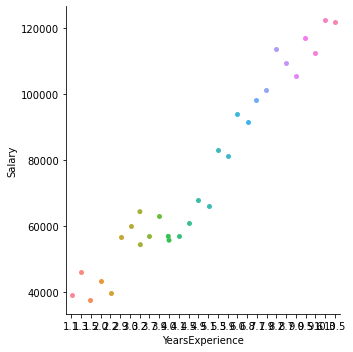

In [8]:
# Prévisualisation des données 
### Linear Model
import seaborn as sns

sns.catplot(x="YearsExperience", y="Salary", data=dataset)

In [9]:
# Gestion des valeurs manquantes 
### Voir s'il y a des valeurs manquantes 
dataset.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [10]:
# Séparation des données en variables explicatives X et target y 
# X = dataset.iloc[:,:-1]
X = dataset[["YearsExperience"]]
# y = dataset.iloc[:,-1]
y = dataset[["Salary"]]

In [11]:
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [105]:
# Normalisation des X
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [71]:
X

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [78]:

# Division du dataset en train et un test set 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
X_test.shape

(6, 1)

In [112]:
# Création du modèle
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [114]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [115]:
regressor.coef_

array([[25793.81158089]])

In [116]:
regressor.intercept_

array([75957.42219872])

In [50]:
# Evaluation du modèle 
regressor.score(X_train, y_train)

# y_pred = regressor.predict(X_train)
# np.mean(np.abs(y - y_pred))
# y_avg = np.mean(y)
# score = R2_adj = 1 - ...

0.9411949620562126

In [83]:
# Vérifcation de l'overfitting 
print("Score de Train : {}".format(regressor.score(X_train, y_train)))
print("Score de Test : {}".format(regressor.score(X_test, y_test)))

Score de Train : 0.9411949620562126
Score de Test : 0.988169515729126


In [106]:
#tester la stabilité du modèle avec plusieurs jeux de données
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    scores.append(regressor.score(X_test, y_test))

                  

In [88]:
import numpy as np
scoresnp = np.array(scores)
print(scoresnp.mean())
print(scoresnp.std())

0.9210017560143833
0.09701602110506578


---> Le train est inférieur au test donc pas d'overfitting, on pourrait même parler d'underfitting. Même si ceci est plutôt lié au peu de données que nous avons dans le dataset 

In [89]:
X_train

,YearsExperience
10,3.9
15,4.9
2,1.5
7,3.2
22,7.9
14,4.5
6,3.0
11,4.0
13,4.1
0,1.1


In [90]:
regressor.predict(X_train)

array([[ 62891.90886103],
       [ 72136.37584524],
       [ 40705.18809891],
       [ 56420.78197208],
       [ 99869.77679789],
       [ 68438.58905156],
       [ 54571.88857523],
       [ 63816.35555945],
       [ 64740.80225787],
       [ 37007.40130523],
       [ 82305.28952788],
       [ 75834.16263893],
       [122056.49756   ],
       [123905.39095684],
       [ 89700.86311525],
       [ 53647.44187681],
       [ 47176.31498786],
       [ 81380.84282946],
       [114660.92397263],
       [ 61043.01546418],
       [ 56420.78197208],
       [110038.69048052],
       [ 45327.42159102],
       [ 38856.29470207]])

In [108]:
xp = 200
xp_normalized = sc_X.transform([[xp]])
print("Predicted Salary: {}".format(regressor.predict(xp_normalized)))
#print("Predicted Salary: {}".format(regressor.predict(np.array([[xp]]))))

Predicted Salary: [[1875731.88446552]]


In [91]:
X_train

,YearsExperience
10,3.9
15,4.9
2,1.5
7,3.2
22,7.9
14,4.5
6,3.0
11,4.0
13,4.1
0,1.1


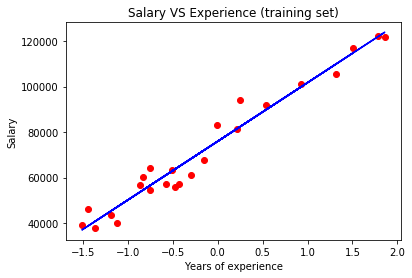

In [110]:
# Visualize our Training Set
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary VS Experience (training set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()



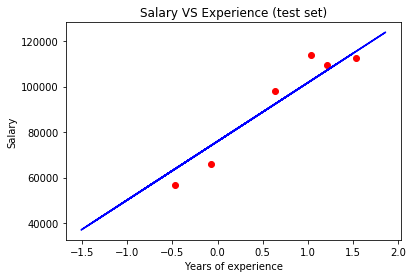

In [111]:
## Visualize our Test Set
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary VS Experience (test set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()